### Convolutional neural network using Tensorflow Functional API
<br><br />
This exercise is to implement a CNN which is very similar to the *LeNet-5* network made to identify hand written digits from the [MNIST database](http://yann.lecun.com/exdb/mnist/). The database was converted to a matlab file externally and imported as it is here.<br><br />

In [121]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

MNIST database example digit:  7


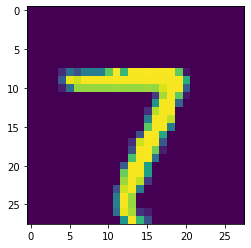

In [119]:
d = sio.loadmat("mnist.mat")

# -- 60,000 training samples --
im = d['trainX']  # (60000, 784) -- images
lb = d['trainY']  # (1, 60000) -- labels

# -- 10,000 test samples --
im_test = d['testX']  # (10000, 784) -- test images
lb_test = d['testY']  # (1, 10000) -- test labels

n = np.random.randint(0,high=60000)

# -- labelled sample from dataset --
print('MNIST database example digit: ', lb[0,n])
plt.imshow(im[n].reshape(28,28))
plt.show()

In [10]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [114]:
## -- Creating CNN model using TF functional API --

# -- input layer
in_put = tf.keras.Input(shape=(28,28,1))
# -- 2D conv layer
im_conv = tf.keras.layers.Conv2D(
    filters=6,
    kernel_size=3,
    activation='relu',
)(in_put)
# -- max pooling layer
pool1 = tf.keras.layers.MaxPool2D(
    pool_size=(2, 2)
)(im_conv)
# -- 2D conv layer
im_conv2 = tf.keras.layers.Conv2D(
    filters=16,
    kernel_size=3,
    activation='relu',
)(pool1)
# -- max pooling layer
pool2 = tf.keras.layers.MaxPool2D(
    pool_size=(2, 2)
)(im_conv2)
# -- dense layers
flat = tf.keras.layers.Flatten()(pool2)
a = tf.keras.layers.Dense(120, activation='relu')(flat)
b = tf.keras.layers.Dense(84, activation='relu')(a)
output = tf.keras.layers.Dense(10, activation='softmax')(b)

model = tf.keras.Model(in_put, output)

In [115]:
## -- compiling and training the model --
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])

model.fit((im/255.).reshape(-1,28,28,1), to_categorical(lb.reshape(-1,1)), epochs=4, batch_size=50)

Epoch 1/4
1200/1200 [==============================] - 9s 8ms/step - loss: 0.2145 - accuracy: 0.9367
Epoch 2/4
1200/1200 [==============================] - 9s 8ms/step - loss: 0.0722 - accuracy: 0.9781
Epoch 3/4
1200/1200 [==============================] - 9s 8ms/step - loss: 0.0525 - accuracy: 0.9841
Epoch 4/4
1200/1200 [==============================] - 9s 8ms/step - loss: 0.0411 - accuracy: 0.9873


In [116]:
## -- evaluating the model with test data --

[loss, acc] = model.evaluate((im_test/255.).reshape(-1,28,28,1), 
                             to_categorical(lb_test.reshape(-1,1)), batch_size=1)
print(f'Accuracy on test data: {round(acc*100,1)} %')

10000/10000 [==============================] - 9s 868us/step - loss: 0.0414 - accuracy: 0.9858
Accuracy on test data: 98.6 %


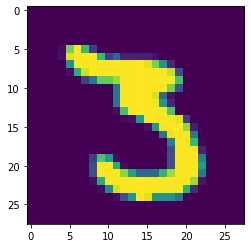

Answer: 3


In [117]:
## -- random output prediction --

n = np.random.randint(0,high=10000)

x = np.array(im_test[n]/255)
x = x.reshape(-1,28,28,1)

plt.imshow(x[0])
plt.show()

print(f'Answer: {np.argmax(model.predict(x))}')